In [877]:
# importing some libs so that we can work with data easily :)
# all of the compution is done on colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [878]:
# reading the csv file by using pandas :)
df = pd.read_csv('ahmedabad.csv' , encoding='utf-8')

In [879]:
df.index

RangeIndex(start=0, stop=6853, step=1)

In [880]:
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Unnamed: 0      0.000000
Title           0.000000
type_area       0.000000
value_area      0.000000
status          0.000000
floor           0.116737
transaction     0.306435
furnishing      0.539910
facing          1.298701
price           0.000000
price_sqft      6.537283
description    25.769736
dtype: float64


# all the data cleaning and feature engineering

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6853 non-null   int64 
 1   Title        6853 non-null   object
 2   type_area    6853 non-null   object
 3   value_area   6853 non-null   object
 4   status       6853 non-null   object
 5   floor        6845 non-null   object
 6   transaction  6832 non-null   object
 7   furnishing   6816 non-null   object
 8   facing       6764 non-null   object
 9   price        6853 non-null   object
 10  price_sqft   6405 non-null   object
 11  description  5087 non-null   object
dtypes: int64(1), object(11)
memory usage: 642.6+ KB


In [882]:
df.isnull().sum()

,0
Unnamed: 0,0
Title,0
type_area,0
value_area,0
status,0
floor,8
transaction,21
furnishing,37
facing,89
price,0


In [883]:
df.duplicated().sum()
df = df.drop_duplicates()

In [884]:
df['price_sqft'].isnull().sum()

np.int64(448)

In [885]:
# DROP the description
df = df.drop(['description', 'Unnamed: 0'], axis=1)

In [886]:
# quick look into the data-set :)
df.head(5)

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,price_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",Super Area,155 sqyrd,Poss. by Dec '26,New Property,Unfurnished,Vivaan Aura,2,â‚¹48.1 Lac,"â‚¹3,444 per sqft"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",Carpet Area,710 sqft,Poss. by Jun '27,New Property,Unfurnished,SP Epitome,2,â‚¹50 Lac,"â‚¹3,876 per sqft"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",Carpet Area,588 sqft,Poss. by Dec '25,New Property,Unfurnished,Pacifica Amara,2,â‚¹40 Lac,"â‚¹3,738 per sqft"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",Carpet Area,687 sqft,Poss. by Jun '26,New Property,Unfurnished,Kavisha AER,2,â‚¹48.8 Lac,"â‚¹3,900 per sqft"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",Carpet Area,621 sqft,Poss. by Mar '25,New Property,Unfurnished,Aarambh Vistara,2,â‚¹48 Lac,"â‚¹4,248 per sqft"


In [887]:
import re
def clean_price(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()

    return re.sub(r'^[^0-9A-Za-z]+','',val)


def price_conversion(val):
    if 'Lac' in val:
        return float(val.replace('Lac', "").strip()) *1e5
    elif "Cr" in val:
        return float(val.replace('Cr', "").strip()) *1e7
    elif "Call for Price" in val:
        return str(val.strip())
    else:
        return float(val.strip())



df['price'] = df['price'].apply(clean_price)
df['price'] = df['price'].apply(price_conversion)

In [888]:
df['type_area'].unique()

array(['Super Area', 'Carpet Area', 'Transaction', 'Status', 'Built Area',
       'Under Construction'], dtype=object)

In [889]:
df['type_area'] = df['type_area'].replace({
    "Super Area": 'super area',
    'Carpet Area': 'carpet area',
    'Transaction': np.nan,
    'Status': np.nan,
    'Under Construction': 'under construction'
} )

df['type_area'].unique()

array(['super area', 'carpet area', nan, 'Built Area',
       'under construction'], dtype=object)

In [890]:
# df['status'].unique()

In [891]:
def status_clean(val):
    val = str(val)

    if "Poss." in val or "Ready to Move" in val or "Under Construction" in val:
        return ("possession", val)
    if val in ["New Property", "Resale"]:
        return ('transaction', val)
    if "out of" in val:
        return ("floor", val)

    if "Const. Age" in val:
        return ("age" , val)

    return ('project', val)

df[['status_type', 'status_value']] = df['status'].apply(status_clean).apply(pd.Series)
df.drop(['status'], axis=1 , inplace=True)

In [892]:
df['status_value'][11]

'Ready to Move'

In [893]:
df['status_type'][11]

'possession'

In [894]:

# df.sample()
# df['facing'].unique()

In [895]:
# it is to check the no of rows and columns in the data-set :)
x = df.shape
print('This data-set has', x[0] , "rows" , 'and' ,x[-1] , "columns")

This data-set has 6853 rows and 11 columns


In [896]:
# we can also need to check data type so there are some couple of ways for it w'll use .dtype method for now
print('data type of the data present in the columns are give below')
print('')
print(df.dtypes)

data type of the data present in the columns are give below

Title           object
type_area       object
value_area      object
floor           object
transaction     object
furnishing      object
facing          object
price           object
price_sqft      object
status_type     object
status_value    object
dtype: object


In [897]:
# null values per column
df.isnull().sum()

,0
Title,0
type_area,4
value_area,0
floor,8
transaction,21
furnishing,37
facing,89
price,0
price_sqft,448
status_type,0


In [898]:
df.duplicated().sum()

np.int64(185)

In [899]:
df = df.drop_duplicates()

In [900]:
df['type_area'].unique()

array(['super area', 'carpet area', nan, 'Built Area',
       'under construction'], dtype=object)

In [901]:
# missing values :)
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Title           0.000000
type_area       0.044991
value_area      0.000000
floor           0.104979
transaction     0.284943
furnishing      0.509898
facing          1.289742
price           0.000000
price_sqft      6.388722
status_type     0.000000
status_value    0.000000
dtype: float64


In [902]:
df.head()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,price_sqft,status_type,status_value
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,"â‚¹3,444 per sqft",possession,Poss. by Dec '26
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,"â‚¹3,876 per sqft",possession,Poss. by Jun '27
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,"â‚¹3,738 per sqft",possession,Poss. by Dec '25
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,"â‚¹3,900 per sqft",possession,Poss. by Jun '26
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,"â‚¹4,248 per sqft",possession,Poss. by Mar '25


In [903]:
# not so important but still if you want you can try storing name of fetaures in variable for record :)

columns = list(df.columns)
columns

['Title',
 'type_area',
 'value_area',
 'floor',
 'transaction',
 'furnishing',
 'facing',
 'price',
 'price_sqft',
 'status_type',
 'status_value']

In [904]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6668 entries, 0 to 6852
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         6668 non-null   object
 1   type_area     6665 non-null   object
 2   value_area    6668 non-null   object
 3   floor         6661 non-null   object
 4   transaction   6649 non-null   object
 5   furnishing    6634 non-null   object
 6   facing        6582 non-null   object
 7   price         6668 non-null   object
 8   price_sqft    6242 non-null   object
 9   status_type   6668 non-null   object
 10  status_value  6668 non-null   object
dtypes: object(11)
memory usage: 625.1+ KB


In [905]:
df.sample()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,price_sqft,status_type,status_value
6200,"4 BHK Apartment for Sale in Iscon Vogue, Panch...",carpet area,3324 sqft,4 out of 22,New Property,Unfurnished,East,48900000.0,"â‚¹8,100 per sqft",possession,Poss. by Dec '25


In [906]:
df["transaction"].unique()

array(['Unfurnished', 'New Property', 'Resale', 'Semi-Furnished',
       'Furnished', 'Shakti Gardenia', 'Other', nan,
       'Gajanan Dev Home Town 4', 'Karnavati Apartment II',
       'Sangani Platinum', 'Saujanya II', 'Harsh Apartment',
       'Bhagwat Elysium', 'Swati Greens', 'Shivalik Sharda Park View 2',
       'Freehold', 'Harshdip Avadh Elegance', 'Bakeri City', '3',
       'Veer Savarker Heights 2 Vasantnagar', 'Galaxy Gala Laxuria',
       'Garden/Park', 'Orchid Heaven', '14 Covered',
       'Shree Balaji Wind Park', 'Samyak 49', '24 Karat', 'The Indus',
       'Super Shaligram', 'Times 40'], dtype=object)

In [907]:
df = df.drop(['price_sqft'], axis=1)

In [908]:
df['Title'][9]

'2 BHK Apartment for Sale in Sun Parkwest, Shela Ahmedabad'

In [909]:
df.sample(5)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value
5331,4 BHK Apartment for Sale in Ambli Road Ahmedabad,carpet area,2559 sqft,5 out of 12,New Property,Unfurnished,East,39900000.0,possession,Poss. by Dec '27
4968,"4 BHK Apartment for Sale in Prayag Residency, ...",super area,3150 sqft,8 out of 10,Resale,Furnished,East,29000000.0,possession,Ready to Move
4845,"4 BHK Apartment for Sale in Eminence 96, Thalt...",carpet area,1980 sqft,11 out of 18,New Property,Unfurnished,North - East,31300000.0,possession,Poss. by Dec '24
6247,"5 BHK Apartment for Sale in Times 40, Rajpath ...",carpet area,3500 sqft,5 out of 21,New Property,Unfurnished,East,68000000.0,possession,Poss. by May '26
2119,2 BHK Builder Floor for Sale in Shree Prashant...,super area,560 sqft,3 out of 5,Resale,Furnished,Shree Prashanti Geeta Apartments,7000000.0,possession,Ready to Move


In [910]:
# clean columns
# 1 type area ----------------- looks good
# 2 value area ------------ just convert sqft and sqm , sqyrd to one singel type
# 3 floor ----------------- convert to 1/7 or something like it form
# 4 transcations -------------- looks useless so may be drop it
# 5 furnishing -------------------- search google or chatgpt as i cant under stand data
# 6 facing ----------------------- make it direction only  or for good drop it as it is not releivent data
# 7 Flat type(new column from title)----------- like 1 BHK , 2 BHK or other
# 8 loaction or building name ---------- from title (after in and before ,)

# so there will be about 7-8 meaningful columns after this

In [911]:
def flat_type(text):
    match = re.search(r'(\d+)', text , re.IGNORECASE)
    if match:
        return match.group(0)
    return None


df['BHK'] = df['Title'].apply(flat_type)

In [912]:
def location(text):
    match = re.search(r'\bin\b\s+(.*)', text , re.IGNORECASE)
    if match:
        return match.group(1)
    return None

df['location'] = df['Title'].apply(location)

In [913]:
# df.sample(10)

In [914]:
df.isnull().sum()

,0
Title,0
type_area,3
value_area,0
floor,7
transaction,19
furnishing,34
facing,86
price,0
status_type,0
status_value,0


In [915]:
df.head(10)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,possession,Poss. by Dec '26,2,"Vivaan Aura, Zundal Ahmedabad"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,possession,Poss. by Jun '27,2,"SP Epitome, Shela Ahmedabad"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,possession,Poss. by Dec '25,2,"Pacifica Amara, Sanand Ahmedabad"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,possession,Poss. by Jun '26,2,"Kavisha AER, Shela Ahmedabad"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,possession,Poss. by Mar '25,2,"Aarambh Vistara, Gota Ahmedabad"
5,"2 BHK Apartment for Sale in Vivaan Essence, Zu...",super area,1413 sqft,New Property,Unfurnished,Vivaan Essence,1 Covered,4990000.0,possession,Poss. by Jun '26,2,"Vivaan Essence, Zundal Ahmedabad"
6,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,700 sqft,7 out of 14,New Property,Unfurnished,East,4910000.0,possession,Poss. by Dec '25,2,"Kavisha AER, Shela Ahmedabad"
7,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",carpet area,85 sqyrd,11 out of 14,New Property,Unfurnished,East,4840000.0,possession,Poss. by Jun '26,2,"Vivaan Aura, Zundal Ahmedabad"
8,"2 BHK Apartment for Sale in Kavisha Atria, She...",carpet area,655 sqft,New Property,Unfurnished,North - East,Garden/Park,4520000.0,possession,Poss. by Jul '24,2,"Kavisha Atria, Shela Ahmedabad"
9,"2 BHK Apartment for Sale in Sun Parkwest, Shel...",carpet area,676 sqft,5 out of 14,New Property,Unfurnished,East,4260000.0,possession,Poss. by Jul '26,2,"Sun Parkwest, Shela Ahmedabad"


In [916]:
df['location'].unique().tolist()

['Vivaan Aura, Zundal Ahmedabad',
 'SP Epitome, Shela Ahmedabad',
 'Pacifica Amara, Sanand Ahmedabad',
 'Kavisha AER, Shela Ahmedabad',
 'Aarambh Vistara, Gota Ahmedabad',
 'Vivaan Essence, Zundal Ahmedabad',
 'Kavisha Atria, Shela Ahmedabad',
 'Sun Parkwest, Shela Ahmedabad',
 'Shilp Ananta, Shela Ahmedabad',
 'Zundal Ahmedabad',
 'Savvy Studioz, Jagatpur Ahmedabad',
 'Devam, Jagatpur Ahmedabad',
 'Orchid Blues, Shela Ahmedabad',
 'Aadhvan Rise, South Bopal, Bopal Ahmedabad',
 'Atlantis wave Ahmedabad',
 'Zaveri Greens, Ghuma Ahmedabad',
 'Mahadev Lavish, South Bopal, Bopal Ahmedabad',
 'Sun Footprints, Shela Ahmedabad',
 'Eden Godrej Garden city, Jagatpur Village, Gota Ahmedabad',
 'Sacred Shivansh, Shela Ahmedabad',
 'Sheladia Eris, Shela Ahmedabad',
 'Shela Ahmedabad',
 'Gota Ahmedabad',
 'HR Eternia, Shela Ahmedabad',
 'Indraprasth Ixora, Shela Ahmedabad',
 'Shoolin Kopren Park View, Vasant Nagar Ahmedabad',
 'Aarambh Zest, Gota Ahmedabad',
 'Aarohi Club Road Ahmedabad',
 'Orchid 

In [917]:
def clean_location(text):
    text = text.strip().strip("'")

    if text.endswith("Ahmedabad"):
        text = text.replace("Ahmedabad", "").strip(", ").strip()

    parts = [p.strip() for p in text.split(",")]

    if len(parts) == 1:
        project = None
        locality = parts[0]
    else:
        project = parts[0]
        locality = " ".join(parts[1:])

    return pd.Series([project, locality, "Ahmedabad"])

df[['Building', 'locality','city']] = df['location'].apply(clean_location)


In [918]:
df = df[df['price'] != 'Call for Price']
df = df.replace('', np.nan).dropna()
df['price'] = df['price'].astype('float64')

In [919]:
def area_fix(text):
    text = str(text).strip().lower()
    result = None

    if text.endswith('sqft'):
        text = text.replace('sqft', "").replace(',', "").strip()
        result= float(text)

    elif text.endswith('sqyrd'):
        text = text.replace('sqyrd', "").replace(',', "").strip()
        result = float(text) * 9

    elif text.endswith('smt'):
        text = text.replace('smt', "").replace(',', "").strip()
        result = float(text) * 10.7639

    return result

df['area_sqft'] = df['value_area'].apply(area_fix)

In [920]:
df.head()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location,Building,locality,city,area_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,possession,Poss. by Dec '26,2,"Vivaan Aura, Zundal Ahmedabad",Vivaan Aura,Zundal,Ahmedabad,1395.0
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,possession,Poss. by Jun '27,2,"SP Epitome, Shela Ahmedabad",SP Epitome,Shela,Ahmedabad,710.0
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,possession,Poss. by Dec '25,2,"Pacifica Amara, Sanand Ahmedabad",Pacifica Amara,Sanand,Ahmedabad,588.0
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,possession,Poss. by Jun '26,2,"Kavisha AER, Shela Ahmedabad",Kavisha AER,Shela,Ahmedabad,687.0
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,possession,Poss. by Mar '25,2,"Aarambh Vistara, Gota Ahmedabad",Aarambh Vistara,Gota,Ahmedabad,621.0


In [921]:
df = df.drop(['Title', 'location'], axis=1)

In [922]:
df = df.drop(['status_value', 'city', 'facing'], axis=1)

In [923]:
df = df.drop(['floor', 'value_area'], axis=1)

In [924]:
df.isnull().mean() * 100

,0
type_area,0.000000
transaction,0.000000
furnishing,0.000000
price,0.000000
status_type,0.000000
BHK,0.000000
Building,0.000000
locality,0.000000
area_sqft,0.781991


In [925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4220 non-null   object 
 1   transaction  4220 non-null   object 
 2   furnishing   4220 non-null   object 
 3   price        4220 non-null   float64
 4   status_type  4220 non-null   object 
 5   BHK          4220 non-null   object 
 6   Building     4220 non-null   object 
 7   locality     4220 non-null   object 
 8   area_sqft    4187 non-null   float64
dtypes: float64(2), object(7)
memory usage: 329.7+ KB


In [926]:
df.sample(10)

,type_area,transaction,furnishing,price,status_type,BHK,Building,locality,area_sqft
5425,carpet area,New Property,Unfurnished,27900000.0,possession,4,Riviera Majestica,Shela,2478.0
413,carpet area,New Property,Semi-Furnished,5500000.0,possession,2,Platina,New CG Road,900.0
4043,carpet area,Resale,Unfurnished,13200000.0,possession,3,Super Shaligram,Gota,1457.0
4823,carpet area,New Property,Unfurnished,37900000.0,possession,4,Oeuvre 2,Bodakdev,2430.0
4965,super area,Resale,Furnished,32500000.0,possession,5,Pacifica Green Acres,Prahlad Nagar,2900.0
3429,carpet area,Resale,Furnished,10000000.0,possession,3,Savvy Swaraj Phase 2,Jagatpur Road,1730.0
3836,carpet area,Resale,Unfurnished,17500000.0,possession,3,Riviera Springs,Shela,1508.0
7,carpet area,New Property,Unfurnished,4840000.0,possession,2,Vivaan Aura,Zundal,765.0
3932,carpet area,Resale,Unfurnished,12500000.0,possession,3,Vivekanand Arise,Satellite,945.0
5906,carpet area,New Property,Unfurnished,29300000.0,possession,5,Riviera Woods,Shela,2479.0


In [927]:
print(df['type_area'].nunique())

2


In [928]:
print(df['transaction'].nunique())

11


In [929]:
print(df['furnishing'].nunique())

125


In [930]:
print(df['status_type'].nunique())

4


In [931]:
print(df['status_type'].unique())

['possession' 'floor' 'transaction' 'age']


In [932]:
def replace_age(text):
    if text == 'age':
        text = text.replace('age', 'old').strip()
        return text
    else:
        return text

df['status_type'] = df['status_type'].apply(replace_age)

In [933]:
df['status_type'].unique()

array(['possession', 'floor', 'transaction', 'old'], dtype=object)

In [934]:
print(df['Building'].nunique())

1342


In [935]:
df['Building'].sample()

,Building
1565,VR Reflection


In [936]:
print(df['locality'].nunique())

261


In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4220 non-null   object 
 1   transaction  4220 non-null   object 
 2   furnishing   4220 non-null   object 
 3   price        4220 non-null   float64
 4   status_type  4220 non-null   object 
 5   BHK          4220 non-null   object 
 6   Building     4220 non-null   object 
 7   locality     4220 non-null   object 
 8   area_sqft    4187 non-null   float64
dtypes: float64(2), object(7)
memory usage: 329.7+ KB


In [938]:
df['BHK'] = df['BHK'].astype('int')
df['BHK'].dtype

dtype('int64')

# Now all the graphs work

In [939]:
df.describe()

,price,BHK,area_sqft
count,4.220000e+03,4220.000000,4187.00000
mean,2.472205e+07,3.319194,2425.04108
std,9.682660e+07,1.044296,11671.65586
min,2.500000e+05,1.000000,12.00000
25%,7.000000e+06,3.000000,1134.50000
50%,1.600000e+07,3.000000,1902.00000
75%,3.370000e+07,4.000000,2970.00000
max,6.181500e+09,9.000000,750000.00000


In [940]:
df_cleaned = df.copy()

In [941]:
# removing outliers for price


Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df[(df['price'] >= lower_fence) & (df['price']<= upper_fence)]

In [942]:
# removing outliers for area


Q1 = df['area_sqft'].quantile(0.25)
Q3 = df['area_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df[(df['area_sqft'] >= lower_fence) & (df['area_sqft']<= upper_fence)]

In [943]:
# removing outliers for BHK


Q1 = df['BHK'].quantile(0.25)
Q3 = df['BHK'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df[(df['BHK'] >= lower_fence) & (df['BHK']<= upper_fence)]

In [944]:
# df_cleaned['furnishing'].unique()

In [945]:
df_cleaned['transaction'].unique()

array(['Unfurnished', 'New Property', 'Resale', 'Semi-Furnished', 'Other',
       'Bhagwat Elysium', 'Furnished', '14 Covered', 'Samyak 49',
       'The Indus', 'Super Shaligram'], dtype=object)

In [946]:
def transaction_fix(text):
    if text not in ['New Property', 'Resale', np.nan]:
        return 'New Property'

    else:
        return text

df_cleaned.loc[:,'transaction'] = df['transaction'].apply(transaction_fix)

In [947]:
def furnishing_fix(text):
    if text not in ['Unfurnished', 'Furnished']:
        return 'Furnished'

    else:
        return text

df_cleaned.loc[:,'furnishing'] = df_cleaned['furnishing'].apply(furnishing_fix)

In [948]:
df_cleaned[['furnishing','transaction']].sample(7)

,furnishing,transaction
4492,Furnished,New Property
3690,Unfurnished,New Property
3403,Furnished,Resale
6126,Furnished,New Property
5955,Unfurnished,Resale
5373,Unfurnished,New Property
3331,Unfurnished,New Property


In [949]:
df_cleaned['status_type'].unique()

array(['possession', 'floor', 'transaction', 'old'], dtype=object)

In [950]:
def fix_status_type(text):
    if text not in ['possession']:
        return 'unpossession'
    else:
        return text

df_cleaned.loc[:, 'status_type'] = df_cleaned['status_type'].apply(fix_status_type)

In [951]:
df_cleaned[['status_type', 'Building']].sample(10)

,status_type,Building
1788,possession,Aaryan Pride
6742,possession,Iscon Vogue
2282,possession,H N Shivalay Shikhar
1470,possession,Dev Aashish 2
3799,possession,Ananya Residency
5712,possession,Enstin Evoq
2102,possession,Kaveri Trisara
1915,possession,Nivaasa
5238,possession,Sankalp Grace 3
4907,possession,Aranyam


In [952]:
# df_cleaned['locality']
df_cleaned = df_cleaned.rename(columns={'furnishing':'furninshed', 'BHK':'bhk', 'type_area':'area_type', 'transaction':'new_property'})

In [953]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4031 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     4031 non-null   object 
 1   new_property  4031 non-null   object 
 2   furninshed    4031 non-null   object 
 3   price         4031 non-null   float64
 4   status_type   4031 non-null   object 
 5   bhk           4031 non-null   int64  
 6   Building      4031 non-null   object 
 7   locality      4031 non-null   object 
 8   area_sqft     4004 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 314.9+ KB


In [954]:
df_cleaned = df.dropna()

In [955]:
np.log1p(df['price']).skew()

np.float64(-0.20719523730875705)

<Axes: xlabel='price', ylabel='Count'>

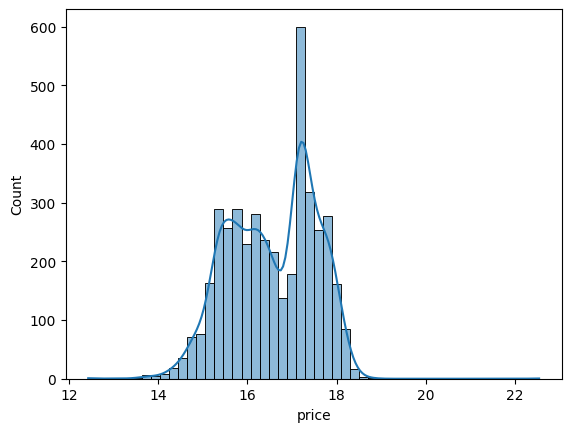

In [956]:
sns.histplot(np.log1p(df['price']), bins=50, kde= True)

<Axes: xlabel='price'>

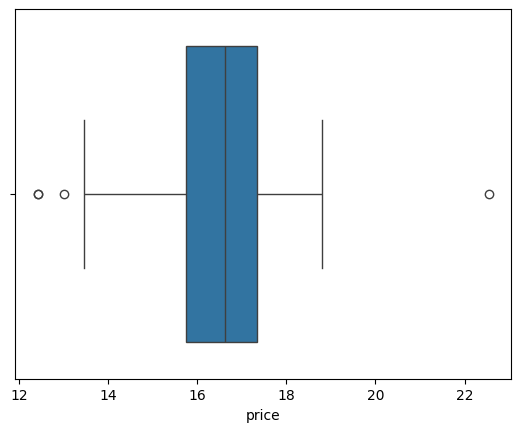

In [957]:
sns.boxplot(x=np.log1p(df_cleaned['price']))

In [958]:
df_cleaned.loc[:,'price'] = np.log1p(df_cleaned['price'])

In [959]:
np.log1p(df_cleaned['area_sqft']).skew()

np.float64(-0.48493589524376784)

<Axes: xlabel='area_sqft', ylabel='Count'>

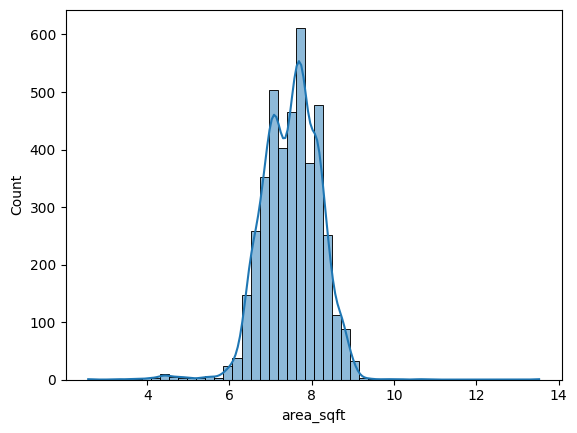

In [960]:
sns.histplot(np.log1p(df['area_sqft']), bins=50, kde=True)

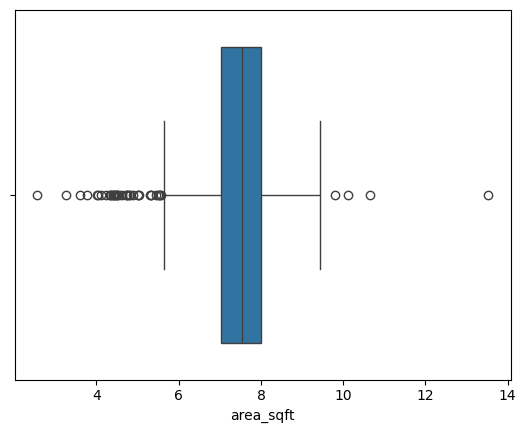

In [961]:
sns.boxplot(x=np.log1p(df_cleaned['area_sqft']))
plt.show()

In [962]:
df_cleaned.loc[:,'area_sqft'] = np.log1p(df_cleaned['area_sqft'])

In [963]:
df['BHK'].skew()

np.float64(-0.2257375756637243)

<Axes: xlabel='BHK', ylabel='Count'>

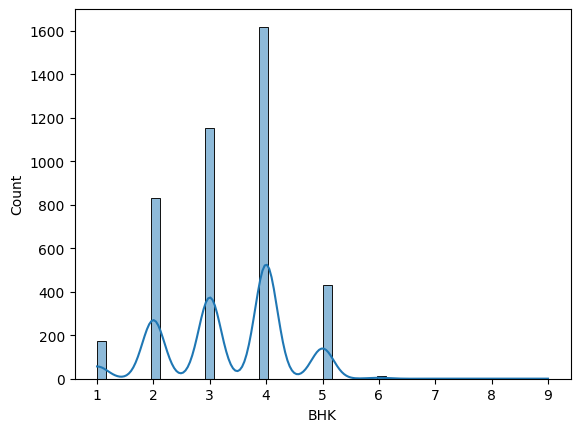

In [964]:
sns.histplot(df['BHK'], bins=50, kde= True)

<Axes: xlabel='BHK'>

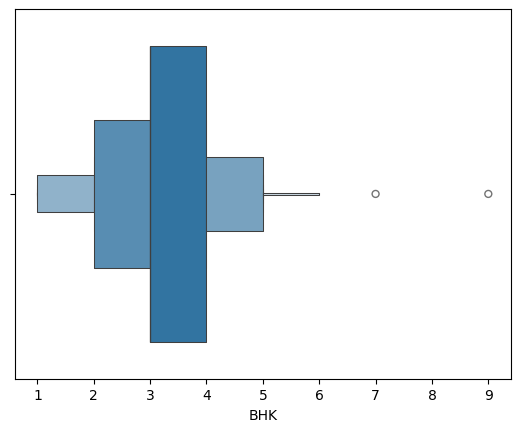

In [965]:
sns.boxenplot(x=(df_cleaned['BHK']))

In [966]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns
print(categorical_col)

Index(['type_area', 'transaction', 'furnishing', 'status_type', 'Building',
       'locality'],
      dtype='object')


In [967]:
print(f"removed : {len(df)} and df_cleaned: {len(df_cleaned)}")

removed : 4220 and df_cleaned: 4187


<Axes: xlabel='area_sqft'>

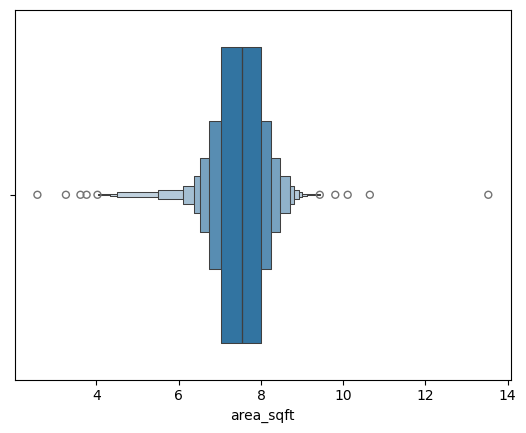

In [968]:
# sns.boxplot(x=df_cleaned['price'])
sns.boxenplot(x=df_cleaned['area_sqft'])

In [969]:
# the columns area_sqft and price are in log1p form

In [978]:
df_cleaned.sample(5)

,type_area,transaction,furnishing,price,status_type,BHK,Building,locality,area_sqft
5741,carpet area,Resale,Unfurnished,17.622173,possession,4,Skara Divyam,Science City,8.005701
6733,carpet area,New Property,Unfurnished,17.813711,possession,4,The Bunglow,Sarkhej Gandhinagar Highway,8.039480
5807,super area,Unfurnished,Shilp Paradise,17.118728,possession,4,Shilp Paradise,Bodakdev,8.125927
5681,carpet area,New Property,Unfurnished,17.476505,possession,4,Oeuvre 2,Bodakdev,7.986505
1849,carpet area,Resale,Unfurnished,15.789592,possession,3,Kadamb Greens,Zundal,6.803505


# data export to the csv file for training on another notebook


In [979]:
df_cleaned.to_csv('cleaned_data.csv', index=False)